<a href="https://colab.research.google.com/github/Nancy-Shi/Individual_Infection_Network/blob/main/1209_Network_computations_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example with 10 nodes, with detailed formula written out**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Parameters ---
n = 10        # number of nodes
p = 0.3       # probability of edge creation

# --- Generate a random network ---
G = nx.erdos_renyi_graph(n=n, p=p, seed=42)

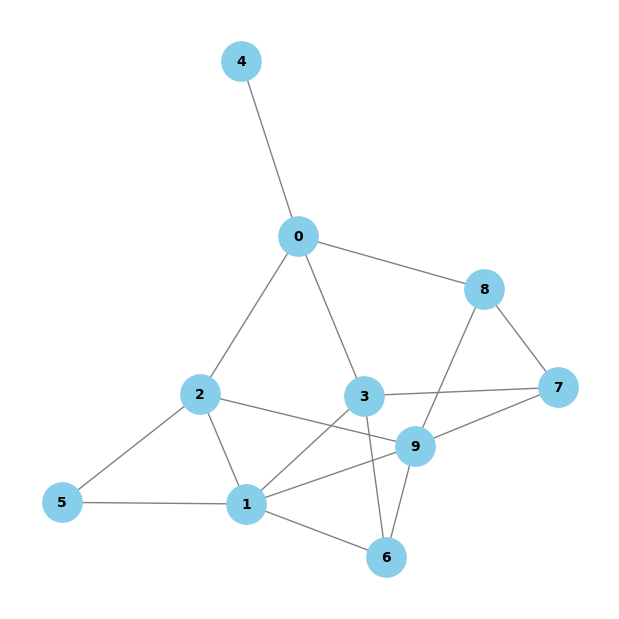

In [ ]:
# --- Draw the network ---
plt.figure(figsize=(6, 6))
nx.draw(
    G,
    with_labels=True,
    node_color="skyblue",
    node_size=800,
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
#plt.title("Random Network with 10 Nodes")
plt.savefig('/content/drive/My Drive/Individual_Attack_Rate/sample_network_for_computation.pdf')
plt.show()


In [ ]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# --- Parameters ---
n = 10        # number of nodes
p = 0.3       # probability of edge creation

# --- Generate a random network ---
G = nx.erdos_renyi_graph(n=n, p=p, seed=42)

# Save graph
with open("/content/drive/My Drive/Individual_Attack_Rate/sample_network_for_computation.pkl", "wb") as f:
    pickle.dump(G, f)



In [ ]:
import pickle
# Load graph
with open("/content/drive/My Drive/Individual_Attack_Rate/sample_network_for_computation.pkl", "rb") as f:
    G_loaded = pickle.load(f)

In [ ]:
import networkx as nx
import sympy as sp

G = G_loaded
p = sp.symbols('p', real=True, nonnegative=True)
seed_nodes = [0]

nodes = list(G.nodes())
node_index = {v: i for i, v in enumerate(nodes)}
n = len(nodes)

def infectious_neighbors(i_node):
    if G.is_directed():
        return list(G.predecessors(i_node))
    else:
        return list(G.neighbors(i_node))

sigmas = sp.symbols('sigma0:'+str(n), real=True)

theta_symbols = {}
theta_list = []
for j_node in nodes:
    neighs_j = infectious_neighbors(j_node)
    for i_node in neighs_j:
        name = f"theta_{j_node}_{i_node}"
        theta = sp.symbols(name, real=True)
        theta_symbols[(j_node, i_node)] = theta
        theta_list.append(theta)

eqs = []
for (j_node, i_node), theta_ji in theta_symbols.items():
    neighs_j = infectious_neighbors(j_node)
    neighs_except_i = [k for k in neighs_j if k != i_node]
    u_ji = 1
    for k_node in neighs_except_i:
        u_ji *= theta_symbols[(k_node, j_node)]
    rhs_theta = 1 - p + p * u_ji
    eqs.append(sp.Eq(theta_ji, rhs_theta))

for i_node in nodes:
    i = node_index[i_node]
    if i_node in seed_nodes:
        eqs.append(sp.Eq(sigmas[i], 1))
    else:
        neighs_i = infectious_neighbors(i_node)
        if len(neighs_i) == 0:
            eqs.append(sp.Eq(sigmas[i], 0))
        else:
            prod_theta = 1
            for j_node in neighs_i:
                prod_theta *= theta_symbols[(j_node, i_node)]
            eqs.append(sp.Eq(sigmas[i], 1 - prod_theta))

print("System of equations (θ and σ):")
for eq in eqs:
    print(eq)

System of equations (θ and σ):
Eq(theta_0_2, p*theta_3_0*theta_4_0*theta_8_0 - p + 1)
Eq(theta_0_3, p*theta_2_0*theta_4_0*theta_8_0 - p + 1)
Eq(theta_0_4, p*theta_2_0*theta_3_0*theta_8_0 - p + 1)
Eq(theta_0_8, p*theta_2_0*theta_3_0*theta_4_0 - p + 1)
Eq(theta_1_2, p*theta_3_1*theta_5_1*theta_6_1*theta_9_1 - p + 1)
Eq(theta_1_3, p*theta_2_1*theta_5_1*theta_6_1*theta_9_1 - p + 1)
Eq(theta_1_5, p*theta_2_1*theta_3_1*theta_6_1*theta_9_1 - p + 1)
Eq(theta_1_6, p*theta_2_1*theta_3_1*theta_5_1*theta_9_1 - p + 1)
Eq(theta_1_9, p*theta_2_1*theta_3_1*theta_5_1*theta_6_1 - p + 1)
Eq(theta_2_0, p*theta_1_2*theta_5_2*theta_9_2 - p + 1)
Eq(theta_2_1, p*theta_0_2*theta_5_2*theta_9_2 - p + 1)
Eq(theta_2_5, p*theta_0_2*theta_1_2*theta_9_2 - p + 1)
Eq(theta_2_9, p*theta_0_2*theta_1_2*theta_5_2 - p + 1)
Eq(theta_3_0, p*theta_1_3*theta_6_3*theta_7_3 - p + 1)
Eq(theta_3_1, p*theta_0_3*theta_6_3*theta_7_3 - p + 1)
Eq(theta_3_6, p*theta_0_3*theta_1_3*theta_7_3 - p + 1)
Eq(theta_3_7, p*theta_0_3*theta_1_3*the

In [ ]:
import networkx as nx

G = G_loaded

def infectious_neighbors(i_node):
    if G.is_directed():
        return list(G.predecessors(i_node))
    else:
        return list(G.neighbors(i_node))

edge_lines = []
seen_edges = set()

for j_node in sorted(G.nodes()):
    neighs_j = infectious_neighbors(j_node)
    for i_node in sorted(neighs_j):
        if (j_node, i_node) in seen_edges:
            continue
        seen_edges.add((j_node, i_node))

        neighs_except_i = [k for k in infectious_neighbors(j_node) if k != i_node]

        if len(neighs_except_i) == 0:
            prod_term = "1"
        else:
            terms = [f"\\theta_{{{k}\\to {j_node}}}" for k in sorted(neighs_except_i)]
            prod_term = "".join(terms)

        theta_name = f"\\theta_{{{j_node}\\to {i_node}}}"
        edge_lines.append(f"{theta_name} &= 1 - p + p\,{prod_term} \\\\")

latex_theta = "\\begin{align*}\n" + "\n".join(edge_lines) + "\n\\end{align*}"
print(latex_theta)

\begin{align*}
\theta_{0\to 2} &= 1 - p + p\,\theta_{3\to 0}\theta_{4\to 0}\theta_{8\to 0} \\
\theta_{0\to 3} &= 1 - p + p\,\theta_{2\to 0}\theta_{4\to 0}\theta_{8\to 0} \\
\theta_{0\to 4} &= 1 - p + p\,\theta_{2\to 0}\theta_{3\to 0}\theta_{8\to 0} \\
\theta_{0\to 8} &= 1 - p + p\,\theta_{2\to 0}\theta_{3\to 0}\theta_{4\to 0} \\
\theta_{1\to 2} &= 1 - p + p\,\theta_{3\to 1}\theta_{5\to 1}\theta_{6\to 1}\theta_{9\to 1} \\
\theta_{1\to 3} &= 1 - p + p\,\theta_{2\to 1}\theta_{5\to 1}\theta_{6\to 1}\theta_{9\to 1} \\
\theta_{1\to 5} &= 1 - p + p\,\theta_{2\to 1}\theta_{3\to 1}\theta_{6\to 1}\theta_{9\to 1} \\
\theta_{1\to 6} &= 1 - p + p\,\theta_{2\to 1}\theta_{3\to 1}\theta_{5\to 1}\theta_{9\to 1} \\
\theta_{1\to 9} &= 1 - p + p\,\theta_{2\to 1}\theta_{3\to 1}\theta_{5\to 1}\theta_{6\to 1} \\
\theta_{2\to 0} &= 1 - p + p\,\theta_{1\to 2}\theta_{5\to 2}\theta_{9\to 2} \\
\theta_{2\to 1} &= 1 - p + p\,\theta_{0\to 2}\theta_{5\to 2}\theta_{9\to 2} \\
\theta_{2\to 5} &= 1 - p + p\,\theta_{0\t

<>:30: SyntaxWarning: invalid escape sequence '\,'
<>:30: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipython-input-3938924193.py:30: SyntaxWarning: invalid escape sequence '\,'
  edge_lines.append(f"{theta_name} &= 1 - p + p\,{prod_term} \\\\")


In [ ]:
node_lines = []

for i_node in sorted(G.nodes()):
    neighs_i = infectious_neighbors(i_node)

    if len(neighs_i) == 0:
        rhs = "1 - 1"
    else:
        terms = [f"\\theta_{{{j}\\to {i_node}}}" for j in sorted(neighs_i)]
        rhs = "1 - " + "".join(terms)

    node_lines.append(f"\\sigma_{{{i_node}}} &= {rhs} \\\\")

latex_sigma = "\\begin{align*}\n" + "\n".join(node_lines) + "\n\\end{align*}"
print(latex_sigma)

\begin{align*}
\sigma_{0} &= 1 - \theta_{2\to 0}\theta_{3\to 0}\theta_{4\to 0}\theta_{8\to 0} \\
\sigma_{1} &= 1 - \theta_{2\to 1}\theta_{3\to 1}\theta_{5\to 1}\theta_{6\to 1}\theta_{9\to 1} \\
\sigma_{2} &= 1 - \theta_{0\to 2}\theta_{1\to 2}\theta_{5\to 2}\theta_{9\to 2} \\
\sigma_{3} &= 1 - \theta_{0\to 3}\theta_{1\to 3}\theta_{6\to 3}\theta_{7\to 3} \\
\sigma_{4} &= 1 - \theta_{0\to 4} \\
\sigma_{5} &= 1 - \theta_{1\to 5}\theta_{2\to 5} \\
\sigma_{6} &= 1 - \theta_{1\to 6}\theta_{3\to 6}\theta_{9\to 6} \\
\sigma_{7} &= 1 - \theta_{3\to 7}\theta_{8\to 7}\theta_{9\to 7} \\
\sigma_{8} &= 1 - \theta_{0\to 8}\theta_{7\to 8}\theta_{9\to 8} \\
\sigma_{9} &= 1 - \theta_{1\to 9}\theta_{2\to 9}\theta_{6\to 9}\theta_{7\to 9}\theta_{8\to 9} \\
\end{align*}


In [ ]:
import numpy as np

def fixed_point_solver_message_passing(G, p_val, seed_nodes,
                                       tol=1e-9, max_iter=10000, relax=0.3):

    nodes = list(G.nodes())
    node_index = {v: i for i, v in enumerate(nodes)}
    n = len(nodes)
    seed_set = set(seed_nodes)

    def infectious_neighbors(i_node):
        if G.is_directed():
            return list(G.predecessors(i_node))
        else:
            return list(G.neighbors(i_node))

    edge_list = []
    sender = []
    receiver = []
    for i_node in nodes:
        for j_node in infectious_neighbors(i_node):
            edge_list.append((j_node, i_node))
            sender.append(node_index[j_node])
            receiver.append(node_index[i_node])

    m = len(edge_list)
    sender = np.array(sender, dtype=int)
    receiver = np.array(receiver, dtype=int)

    incoming_edges_per_node = [[] for _ in range(n)]
    for e_idx, i_idx in enumerate(receiver):
        incoming_edges_per_node[i_idx].append(e_idx)

    incoming_excl = []
    for e_idx, (j_node, i_node) in enumerate(edge_list):
        j_idx = node_index[j_node]
        inc_j = incoming_edges_per_node[j_idx]
        excl = [e for e in inc_j if sender[e] != node_index[i_node]]
        incoming_excl.append(excl)

    theta = np.ones(m, dtype=float)
    for e_idx in range(m):
        if nodes[sender[e_idx]] in seed_set:
            theta[e_idx] = 1.0 - p_val

    for _ in range(max_iter):
        theta_old = theta.copy()
        theta_new = theta.copy()

        for e_idx, (j_node, i_node) in enumerate(edge_list):
            if j_node in seed_set:
                theta_new[e_idx] = 1.0 - p_val
                continue
            excl_list = incoming_excl[e_idx]
            if len(excl_list) == 0:
                u_ji = 1.0
            else:
                u_ji = 1.0
                for e_in in excl_list:
                    u_ji *= theta_old[e_in]
            theta_new[e_idx] = 1.0 - p_val + p_val * u_ji

        theta = (1.0 - relax) * theta_old + relax * theta_new
        if np.max(np.abs(theta - theta_old)) < tol:
            break

    sigma_vals = np.zeros(n, dtype=float)
    for s in seed_nodes:
        sigma_vals[node_index[s]] = 1.0

    for i_node in nodes:
        i_idx = node_index[i_node]
        if i_node in seed_set:
            continue
        inc_edges = incoming_edges_per_node[i_idx]
        if len(inc_edges) == 0:
            sigma_vals[i_idx] = 0.0
        else:
            prod_theta = 1.0
            for e_idx in inc_edges:
                prod_theta *= theta[e_idx]
            sigma_vals[i_idx] = 1.0 - prod_theta

    return sigma_vals

In [ ]:
import os
import numpy as np
import pandas as pd

G = G_loaded
p_val = 0.200

def compute_attack_matrix(G, p_val):
    nodes = list(G.nodes())
    node_index = {v: i for i, v in enumerate(nodes)}
    n = len(nodes)
    mat = np.zeros((n, n))
    for s in nodes:
        sigma = fixed_point_solver_message_passing(G, p_val, [s])
        mat[:, node_index[s]] = sigma
    return nodes, mat

def save_attack_csv(nodes, mat, p_val,
                    outdir="/content/drive/My Drive/Individual_Attack_Rate"):
    os.makedirs(outdir, exist_ok=True)
    df = pd.DataFrame(
        mat,
        index=[f"sigma_{i}" for i in nodes],
        columns=[f"Seed {i}" for i in nodes]
    )
    path = os.path.join(outdir, f"individual_attack_rates_p{p_val:.3f}.csv")
    df.to_csv(path, float_format="%.6f")
    return path, df


In [ ]:
nodes, mat = compute_attack_matrix(G, p_val)
csv_path, df = save_attack_csv(nodes, mat, p_val)

print("\nSaved CSV:", csv_path)
print(df.head())


Saved CSV: /content/drive/My Drive/Individual_Attack_Rate/individual_attack_rates_p0.200.csv
           Seed 0    Seed 1    Seed 2    Seed 3    Seed 4    Seed 5    Seed 6  \
sigma_0  1.000000  0.115036  0.224398  0.225778  0.203801  0.067576  0.084515   
sigma_1  0.125753  1.000000  0.288281  0.269278  0.027335  0.254065  0.283350   
sigma_2  0.231626  0.280328  1.000000  0.127946  0.048725  0.248683  0.123925   
sigma_3  0.231097  0.259542  0.126382  1.000000  0.048580  0.078550  0.255309   
sigma_4  0.200000  0.023007  0.044880  0.045156  1.000000  0.013515  0.016903   

           Seed 7    Seed 8    Seed 9  
sigma_0  0.104163  0.223120  0.120564  
sigma_1  0.125040  0.102797  0.292096  
sigma_2  0.093547  0.109093  0.261279  
sigma_3  0.234323  0.114964  0.159180  
sigma_4  0.020833  0.044624  0.024113  


In [ ]:
def attack_matrix_to_latex(csv_path, seeds_per_table=5):
    df = pd.read_csv(csv_path, index_col=0)
    mat = df.to_numpy()
    nodes = list(range(mat.shape[0]))

    latex_tables = []
    n = mat.shape[1]
    groups = [list(range(i, min(i + seeds_per_table, n))) for i in range(0, n, seeds_per_table)]

    for g_idx, group in enumerate(groups):
        header = " & " + " & ".join([f"Seed {s}" for s in group]) + r" \\"
        lines = []
        for i in nodes:
            row_vals = []
            for s in group:
                val = mat[i, s]
                if i == s:
                    row_vals.append(f"{val:.6f}\\,*")
                else:
                    row_vals.append(f"{val:.6f}")
            line = f"$\\sigma_{{{i}}}$ & " + " & ".join(row_vals) + r" \\"
            lines.append(line)

        caption = f"Numerical solution at $p = 0.200$.{' (Continued)' if g_idx>0 else ''} Starting node value in each seed scenario (column) is labeled with a *."

        table = (
            r"\begin{table}[h!]" "\n"
            r"\centering" "\n"
            rf"\caption{{{caption}}}" "\n"
            r"\begin{tabular}{c " + " ".join(["c"] * len(group)) + "}" "\n"
            r"\hline" "\n"
            r"$\sigma_i$ " + header + "\n"
            r"\hline" "\n"
            + "\n".join(lines) + "\n"
            r"\hline" "\n"
            r"\end{tabular}" "\n"
            r"\end{table}" "\n"
        )

        latex_tables.append(table)

    return "\n".join(latex_tables)

In [ ]:
csv_path = "/content/drive/My Drive/Individual_Attack_Rate/individual_attack_rates_p0.200.csv"

latex_output = attack_matrix_to_latex(csv_path)

print(latex_output)

\begin{table}[h!]
\centering
\caption{Numerical solution at $p = 0.200$. Starting node value in each seed scenario (column) is labeled with a *.}
\begin{tabular}{c c c c c c}
\hline
$\sigma_i$  & Seed 0 & Seed 1 & Seed 2 & Seed 3 & Seed 4 \\
\hline
$\sigma_{0}$ & 1.000000\,* & 0.115036 & 0.224398 & 0.225778 & 0.203801 \\
$\sigma_{1}$ & 0.125753 & 1.000000\,* & 0.288281 & 0.269278 & 0.027335 \\
$\sigma_{2}$ & 0.231626 & 0.280328 & 1.000000\,* & 0.127946 & 0.048725 \\
$\sigma_{3}$ & 0.231097 & 0.259542 & 0.126382 & 1.000000\,* & 0.048580 \\
$\sigma_{4}$ & 0.200000 & 0.023007 & 0.044880 & 0.045156 & 1.000000\,* \\
$\sigma_{5}$ & 0.068066 & 0.240055 & 0.241380 & 0.075613 & 0.014597 \\
$\sigma_{6}$ & 0.088650 & 0.274455 & 0.123175 & 0.256609 & 0.019231 \\
$\sigma_{7}$ & 0.106297 & 0.116701 & 0.090862 & 0.231797 & 0.022850 \\
$\sigma_{8}$ & 0.225108 & 0.094945 & 0.105664 & 0.112754 & 0.047045 \\
$\sigma_{9}$ & 0.130188 & 0.289676 & 0.266786 & 0.165627 & 0.028309 \\
\hline
\end{tabular}
\end{

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

def plot_boxplot_rows_colored_by_degree(csv_path, G, max_nodes=None, cmap_name="viridis"):
    df = pd.read_csv(csv_path, index_col=0)
    mat = df.to_numpy()

    node_labels = df.index.to_list()
    node_ids = np.array([int(s.replace("sigma_","")) for s in node_labels])

    degrees = dict(G.degree())

    n_nodes = mat.shape[0]
    if max_nodes is not None:
        n_use = min(max_nodes, n_nodes)
    else:
        n_use = n_nodes

    row_indices = np.arange(n_use)
    used_node_ids = node_ids[row_indices]
    row_deg = np.array([degrees[n] for n in used_node_ids])

    norm = Normalize(vmin=row_deg.min(), vmax=row_deg.max())
    cmap = get_cmap(cmap_name)

    fig, ax = plt.subplots(figsize=(10, 5))
    data_for_boxplot = [mat[i, :] for i in row_indices]

    bp = ax.boxplot(data_for_boxplot, positions=row_indices, patch_artist=True, showfliers=False)

    for patch, d in zip(bp['boxes'], row_deg):
        patch.set_facecolor(cmap(norm(d)))

    ax.set_xlabel("Node index")
    ax.set_ylabel(r"$\sigma_i$")
    ax.set_xticks(row_indices)
    ax.set_xticklabels(row_indices)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("Node degree")

    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/Individual_Attack_Rate/boxplot_nodes_by_row_degree.pdf')
    plt.show()

/tmp/ipython-input-4072467733.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(cmap_name)


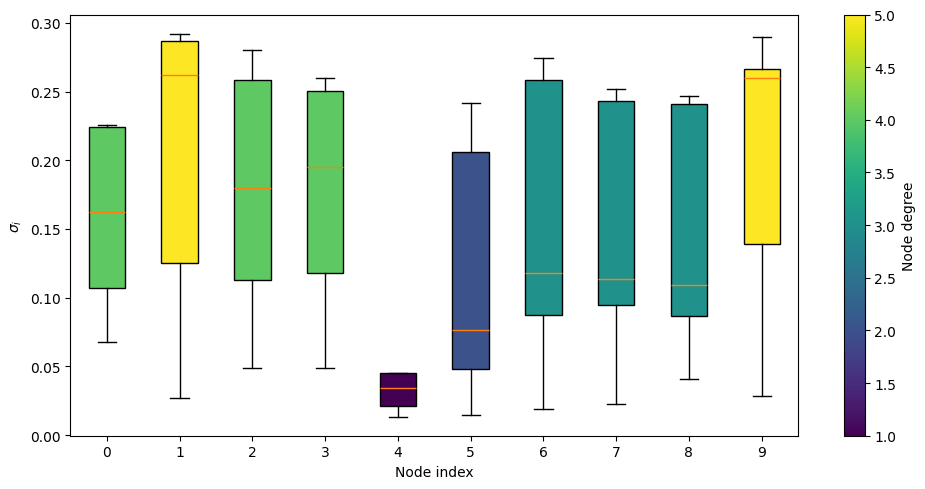

In [ ]:
csv_path = "/content/drive/My Drive/Individual_Attack_Rate/individual_attack_rates_p0.200.csv"
plot_boxplot_rows_colored_by_degree(csv_path, G_loaded)